In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
results = Table.read_table('results_trimmed.csv')
results

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0
5888091,4,7,nan,yes,nan,0.571,yes,4,3.28,no,3,2.32
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0


<h2>Creating Accuracy Ratings</h2>

It will be necessary to have a number for expert accuracy in the cases where there was a majority vote, to compare against crowd accuracy.

As for crowd accuracy for these cases, we will calculate from the 'Difficulty' column:
 
"Difficulty: Qualified Reads without the Correct Label divided by total Qualified Reads."

In [9]:
expert_yes_votes = results.column(1)
expert_yes_votes

array([ 2.,  0.,  0., ...,  4.,  5.,  5.])

In [10]:
def calc_expert_accuracy(num):
    '''Calculate accuracy rating, from the number of Yes votes, based on a majority vote out of 8. 
    The case where (num < 4) means the majority vote was No.'''
    if num > 4:
        return num/8
    elif num < 4:
        return (8-num)/8
    elif num == 4:
        return None

In [11]:
len(expert_yes_votes)

27000

In [12]:
expert_accuracy = [calc_expert_accuracy(value) for value in expert_yes_votes]
print(len(expert_accuracy))
set(expert_accuracy)

27000


{0.625, 0.75, 0.875, 1.0, None}

In [13]:
results_with_accuracy = results.with_column('Expert Accuracy', expert_accuracy)
results_with_accuracy

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1
5888091,4,7,nan,yes,nan,0.571,yes,4,3.28,no,3,2.32,None
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1


In [15]:
crowd_accuracy = 1 - results.column('Difficulty')
crowd_accuracy

array([ 1. ,  1. ,  1. , ...,  nan,  nan,  0.8])

In [22]:
results_with_accuracy = results_with_accuracy.with_column('Crowd Accuracy', crowd_accuracy)
results_with_accuracy

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy,Crowd Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75,1
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1,1
5888091,4,7,nan,yes,nan,0.571,yes,4,3.28,no,3,2.32,None,nan
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1,1


<h3>Data Cleaning</h3>

Before we can compare the expert accuracy score with the crowd accuracy score, some more issues need to be cleaned up in the data. First, we need just the rows where the correct label is defined.

In [23]:
correct_label_exists = results_with_accuracy.where('Correct Label', are.not_equal_to('nan'))
correct_label_exists

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy,Crowd Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75,1
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1,1
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1,1
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1,1


And then, we will discover that there are some cases that have no crowd vote recorded. So we'll need to get rid of those too.

In [24]:
set(correct_label_exists.column('Crowd Accuracy'))

{0.0,
 0.099999999999999978,
 0.25,
 0.5,
 0.66700000000000004,
 0.75,
 0.80000000000000004,
 0.83299999999999996,
 0.85699999999999998,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.375,
 nan,
 nan,
 0.875,
 nan,
 0.63600000000000001,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.90900000000000003,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.71399999999999997,
 0.77800000000000002,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.33299999999999996,
 0.58299999999999996,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.57099999999999995,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.625,
 nan,
 nan,
 nan,
 0.81800000000000006,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.55600000000000005,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.11099999999999999,
 0.30000000000000004,
 nan,
 na

In [25]:
experts_vs_crowd = correct_label_exists.column('Expert Accuracy') - correct_label_exists.column('Crowd Accuracy')
experts_vs_crowd

array([-0.25, 0.0, 0.0, ..., 0.29200000000000004, nan, -0.17500000000000004], dtype=object)

In [26]:
correct_label_exists.show(100)

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy,Crowd Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75,1
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1,1
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1,1
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1,1


Only taking cases where qualified reads are a positive number:

In [27]:
correct_label_and_qualified_reads = correct_label_exists.where('Qualified Reads', are.above(0))
correct_label_and_qualified_reads

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy,Crowd Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75,1
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1,1
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1,1
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1,1


In [28]:
set(correct_label_and_qualified_reads.column('Crowd Accuracy'))

{0.0,
 0.09099999999999997,
 0.099999999999999978,
 0.11099999999999999,
 0.125,
 0.14300000000000002,
 0.16700000000000004,
 0.18200000000000005,
 0.19999999999999996,
 0.22199999999999998,
 0.25,
 0.27300000000000002,
 0.28600000000000003,
 0.30000000000000004,
 0.33299999999999996,
 0.36399999999999999,
 0.375,
 0.40000000000000002,
 0.41700000000000004,
 0.42900000000000005,
 0.44399999999999995,
 0.45499999999999996,
 0.5,
 0.54499999999999993,
 0.55600000000000005,
 0.57099999999999995,
 0.58299999999999996,
 0.59999999999999998,
 0.625,
 0.63600000000000001,
 0.64300000000000002,
 0.66700000000000004,
 0.69199999999999995,
 0.69999999999999996,
 0.71399999999999997,
 0.72699999999999998,
 0.75,
 0.76900000000000002,
 0.77800000000000002,
 0.80000000000000004,
 0.81800000000000006,
 0.83299999999999996,
 0.84599999999999997,
 0.85699999999999998,
 0.875,
 0.88900000000000001,
 0.90000000000000002,
 0.90900000000000003,
 0.91700000000000004,
 0.92300000000000004,
 0.92900000000000

<h2>Calculating a Comparison Score for Expert Accuracy vs Crowd Accuracy</h2>

The comparison score will be calculated by subtracting crowd accuracy rate from expert accuracy rate.

In [30]:
comparison = correct_label_and_qualified_reads.column('Expert Accuracy') - correct_label_and_qualified_reads.column('Crowd Accuracy')
comparison

array([-0.25, 0.0, 0.0, ..., 0.75, 0.29200000000000004,
       -0.17500000000000004], dtype=object)

In [31]:
results_with_comparison = correct_label_and_qualified_reads.with_column('Comparison', comparison)
results_with_comparison

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy,Crowd Accuracy,Comparison
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75,1,-0.25
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1,1,0
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1,1,0
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1,1,0
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1,1,0
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1,1,0
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1,1,0
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1,1,0
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1,1,0
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1,1,0


In [32]:
comparison_tbl = results_with_comparison.select('Expert Accuracy', 'Crowd Accuracy', 'Comparison')
comparison_tbl

Expert Accuracy,Crowd Accuracy,Comparison
0.75,1,-0.25
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0


In [33]:
t1 = comparison_tbl.where('Comparison', 0)

In [35]:
set(t1.column('Crowd Accuracy'))

{0.625, 0.75, 0.875, 1.0}

In [36]:
set(t1.column('Expert Accuracy'))

{0.625, 0.75, 0.875, 1.0}

<h2>Analysis</h2>

Interpretation of the comparison number:

- 0 means the expert accuracy and the crowd accuracy were the same.
- Positive numbers mean expert accuracy rate was higher than crowd.
- Negative numbers mean crowd accuracy rate was higher than experts.

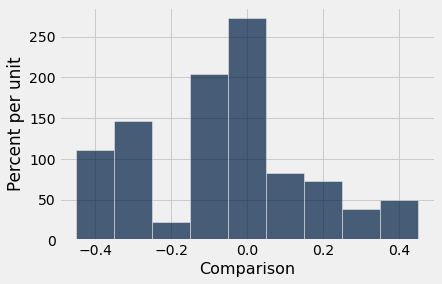

In [37]:
comparison_tbl.hist('Comparison', bins=np.arange(-0.45, 0.46, 0.1))

In [38]:
same_accuracy_rate = (len(comparison) - np.count_nonzero(comparison)) / len(comparison)
same_accuracy_rate

0.19563936358279316

In [39]:
experts_higher_rate = np.count_nonzero(comparison > 0) / len(comparison)
experts_higher_rate

0.37448438420742486

In [40]:
crowd_higher_rate = np.count_nonzero(comparison < 0) / len(comparison)
crowd_higher_rate

0.429876252209782

In [41]:
same_accuracy_rate + experts_higher_rate + crowd_higher_rate

1.0

Numbers of interest that arise out of this comparison:
    
<strong>Equal accuracy rate:</strong> 19.6% of the time both the crowd and the experts had the same accuracy rate.

<strong>Expert accuracy rate higher:</strong> 37.4% of cases have the expert accuracy rate higher than the crowd's.

<strong>Crowd accuracy rate higher:</strong> 43.0% of cases have the crowd with the higher accuracy rate over the experts.

In these numbers overall, the crowd accuracy rate is <i>at least as good as</i> the expert accuracy rate 62.6% of the time.

<h2>Comparing Cases In More Detail</h2>

<h3>Expert Vote Unanimous</h3>

How does the comparison look specifically on cases where the experts were unanimous?

In [44]:
experts_unanimous = comparison_tbl.where('Expert Accuracy', 1)
experts_unanimous

Expert Accuracy,Crowd Accuracy,Comparison
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0


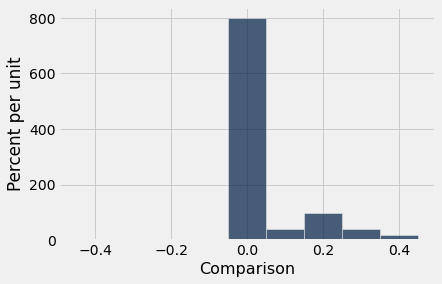

In [45]:
experts_unanimous.hist('Comparison', bins=np.arange(-0.45, 0.46, 0.1))

In [46]:
experts_unanimous.num_rows

5949

In [47]:
np.count_nonzero(experts_unanimous.column('Comparison'))

1638

In [48]:
1638/5949

0.2753403933434191

In cases where the experts were unanimous with their labeling, by definition their accuracy is 100%. We can look at the comparison score to get a sense of how closely the crowd labeling followed along. 

27.5% of the time in this case, the expert accuracy was higher than that of the crowd, meaning the crowd chose incorrectly. Equivalently, the crowd did choose the correct label 72.5% of the time.

<h3>Slim Majority in Expert Votes</h3>

What about more difficult cases where the experts were as close as possible to a tie? In terms of our expert accuracy rate, this kind of case has the value 5/8.

In [50]:
experts_5_votes = comparison_tbl.where('Expert Accuracy', 5/8)
experts_5_votes

Expert Accuracy,Crowd Accuracy,Comparison
0.625,1,-0.375
0.625,0.857,-0.232
0.625,0.25,0.375
0.625,0,0.625
0.625,0.857,-0.232
0.625,0.4,0.225
0.625,1,-0.375
0.625,0,0.625
0.625,0,0.625
0.625,0.8,-0.175


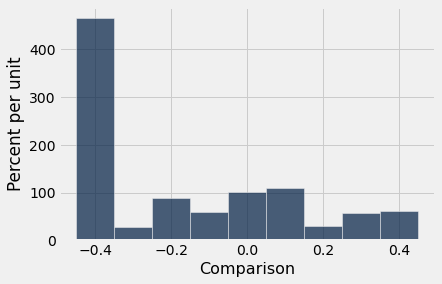

In [51]:
experts_5_votes.hist('Comparison', bins=np.arange(-0.45, 0.46, 0.1))

In [52]:
experts_5_votes.num_rows

5934

In [53]:
np.count_nonzero(experts_5_votes.column('Comparison') < 0)

3402

In [54]:
3402/5934

0.5733063700707786

In these slim expert majority cases, the crowd actually outperformed. 57.3% of the time, the crowd accuracy rating was higher than the expert accuracy rating.

<h2>Expert Vote Tied, Correct Label Undefined</h2>

By the way we've defined a correct label, we simply don't have one in the difficult cases where the expert vote came out tied. But it's still interesting to consider the question of how the crowd votes tended to turn out in these cases. Were they also split? Or, was there a notably higher amount of agreement among the crowd votes?

In [55]:
no_correct_label = results.where('Expert Yes Votes', 4)
no_correct_label

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight
5888091,4,7,nan,yes,nan,0.571,yes,4,3.28,no,3,2.32
5888782,4,5,nan,no,nan,1,no,5,3.94,yes,0,0
5891822,4,5,nan,yes,nan,0.8,yes,4,3.1,no,1,0.76
5891960,4,7,nan,no,nan,1,no,7,5.53,yes,0,0
5891979,4,8,nan,no,nan,0.625,no,5,3.92,yes,3,2.38
5892075,4,8,nan,yes,nan,0.625,yes,5,3.88,no,3,2.32
5892087,4,2,nan,yes,nan,0.5,yes,1,0.84,no,1,0.88
5892132,4,11,nan,yes,nan,0.545,yes,6,4.7,no,5,3.84
5892139,4,10,nan,yes,nan,0.7,yes,7,5.64,no,3,2.38
5892162,4,8,nan,yes,nan,1,yes,8,6.46,no,0,0


In [56]:
set(no_correct_label.column('Qualified Reads'))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18}

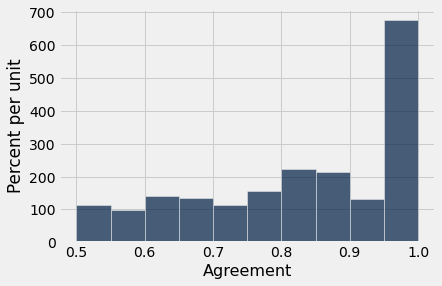

In [57]:
no_correct_label.hist('Agreement')

In [58]:
np.count_nonzero(no_correct_label.column('Qualified Reads') == 1)

4

In [65]:
np.count_nonzero(no_correct_label.column('Agreement') == 1) / no_correct_label.num_rows

0.338

In [64]:
np.count_nonzero(no_correct_label.column('Agreement') > 0.75) / no_correct_label.num_rows

0.652

In about one third of these cases, the crowd vote was unanimous. (This is not accounted for by there being only one qualified read, as that situation occurs in only a negligible amount of the data.)

In about two thirds of these cases, the crowd vote leaned at least 75% in one direction.